In [1]:
#import packages
import numpy as np
import pandas as pd



In [2]:
movie = pd.read_csv('movie.csv') 
name = pd.read_csv('name.csv')
rating = pd.read_csv('rating.csv')
title = pd.read_csv('title.csv')

C:\Users\52628\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preprocessing

In [3]:
#convert genre to hotcode
#genre = movie 
dummies = movie['genre'].str.get_dummies(sep=', ')
movie = pd.concat([movie, dummies], axis=1)
#movie.drop("genre", inplace=True, axis=1)

In [4]:
#Merge four dataframes and drop duplicates
title = title[title['category'] == 'director']
title.sort_values(by=['imdb_title_id', 'ordering'])
title.drop_duplicates('imdb_title_id', keep='first', inplace=True)
title.drop(['characters', 'job', 'ordering', 'category'], axis=1, inplace = True)

In [5]:
title = title.merge(name, how='left', on='imdb_name_id')

In [6]:
movie = movie.merge(rating, how='outer', on='imdb_title_id')

In [7]:
df = movie.merge(title, how='left', on='imdb_title_id')

In [8]:
df['imdb_title_id'] = df['imdb_title_id'].apply(lambda x: x[2:])  # delete 'tt's in id
df.set_index('imdb_title_id', inplace=True)

In [9]:
# Year cleaning
import re
df['year']=df['year'].apply(lambda x:int(re.search(r'(\d{4})',str(x)).group(1)))

In [10]:
# Convert Description to String
df["description"] = df["description"].astype(str)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\52628\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#text mining for description
#add complexity based on description
#new attribute: 'des_complexity'
def get_complexity(text):
    import nltk
    from nltk import sent_tokenize,word_tokenize
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

def label_row (row):
      return get_complexity(row['description'])

df['des_complexity'] = df.apply (lambda row: label_row(row), axis=1)

In [13]:
#Word stemmer function for text
def stemmer_func(text):
    from nltk.stem.porter import PorterStemmer
    import nltk
    from nltk import sent_tokenize,word_tokenize 
    p_stemmer = PorterStemmer()
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    sentences = sent_tokenize(striptext)
    words = word_tokenize(striptext)
    text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
    return text


# Exploratory

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 85855 entries, 0000009 to 9914942
Data columns (total 112 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    title                      object 
 1    original_title             object 
 2    year                       int64  
 3    date_published             object 
 4    genre                      object 
 5    duration                   int64  
 6    country                    object 
 7    language                   object 
 8    director                   object 
 9    writer                     object 
 10   production_company         object 
 11   actors                     object 
 12   description                object 
 13   avg_vote                   float64
 14   votes                      int64  
 15   budget                     object 
 16   usa_gross_income           object 
 17   worlwide_gross_income      object 
 18   metascore                  float64
 19   reviews_from_users  

In [15]:
df

title                  original_title  \
imdb_title_id                                                                   
0000009                            Miss Jerry                      Miss Jerry   
0000574           The Story of the Kelly Gang     The Story of the Kelly Gang   
0001892                        Den sorte drøm                  Den sorte drøm   
0002101                             Cleopatra                       Cleopatra   
0002130                             L'Inferno                       L'Inferno   
...                                       ...                             ...   
9908390                               Le lion                         Le lion   
9911196        De Beentjes van Sint-Hildegard  De Beentjes van Sint-Hildegard   
9911774             Padmavyuhathile Abhimanyu       Padmavyuhathile Abhimanyu   
9914286                     Sokagin Çocuklari               Sokagin Çocuklari   
9914942            La vida sense la Sara Amat      La vida sense la Sara Amat   

               year date_published                      genre  duration  \
imdb_title_id                                                             
0000009        1894     1894-10-09                    Romance        45   
0000574        1906     1906-12-26    Biography, Crime, Drama        70   
0001892        1911     1911-08-19                      Drama        53   
0002101        1912     1912-11-13             Drama, History       100   
0002130        1911     1911-03-06  Adventure, Drama, Fantasy        68   
...             ...            ...                        ...       ...   
9908390        2020     2020-01-29                     Comedy        95   
9911196        2020     2020-02-13              Comedy, Drama       103   
9911774        2019     2019-03-08                      Drama       130   
9914286        2019     2019-03-15              Drama, Family        98   
9914942        2019     2020-02-05                      Drama        74   

                        country       language  \
imdb_title_id                                    
0000009                     USA           None   
0000574               Australia           None   
0001892        Germany, Denmark            NaN   
0002101                     USA        English   
0002130                   Italy        Italian   
...                         ...            ...   
9908390         France, Belgium         French   
9911196             Netherlands  German, Dutch   
9911774                   India      Malayalam   
9914286                  Turkey        Turkish   
9914942                   Spain        Catalan   

                                          director  \
imdb_title_id                                        
0000009                            Alexander Black   
0000574                               Charles Tait   
0001892                                  Urban Gad   
0002101                         Charles L. Gaskill   
0002130        Francesco Bertolini, Adolfo Padovan   
...                                            ...   
9908390                     Ludovic Colbeau-Justin   
9911196                            Johan Nijenhuis   
9911774                            Vineesh Aaradya   
9914286                          Ahmet Faik Akinci   
9914942                                  Laura Jou   

                                              writer  ...  \
imdb_title_id                                         ...   
0000009                              Alexander Black  ...   
0000574                                 Charles Tait  ...   
0001892        Urban Gad, Gebhard Schätzler-Perasini  ...   
0002101                             Victorien Sardou  ...   
0002130                              Dante Alighieri  ...   
...                                              ...  ...   
9908390        Alexandre Coquelle, Matthieu Le Naour  ...   
9911196                 Radek Bajgar, Herman Finkers  ...   
9911774             Vineesh Aaradya, Vineesh A

In [16]:
pd.options.display.min_rows = 10000000000000000
print(df.isnull().sum())

title                         0
original_title                0
year                          0
date_published                0
genre                         0
duration                      0
country                      64
language                    833
director                     87
writer                     1572
production_company         4455
actors                       69
description                   0
avg_vote                      0
votes                         0
budget                    62145
usa_gross_income          70529
worlwide_gross_income     54839
metascore                 72550
reviews_from_users         7597
reviews_from_critics      11797
Action                        0
Adult                         0
Adventure                     0
Animation                     0
Biography                     0
Comedy                        0
Crime                         0
Documentary                   0
Drama                         0
                          ...  
females_

In [17]:
df2 = df.loc[:, (df.isin([' ','NULL',0]) | df.isnull()).mean() <= .6]
print(df2.isnull().sum())

title                           0
original_title                  0
year                            0
date_published                  0
genre                           0
duration                        0
country                        64
language                      833
director                       87
writer                       1572
production_company           4455
actors                         69
description                     0
avg_vote                        0
votes                           0
reviews_from_users           7597
reviews_from_critics        11797
Drama                           0
weighted_average_vote           0
total_votes                     0
mean_vote                       0
median_vote                     0
votes_10                        0
votes_9                         0
votes_8                         0
votes_7                         0
votes_6                         0
votes_5                         0
votes_4                         0
votes_3       

In [18]:
df.median()

year                        2003.0
duration                      96.0
avg_vote                       6.1
votes                        484.0
metascore                     57.0
reviews_from_users             9.0
reviews_from_critics           8.0
Action                         0.0
Adult                          0.0
Adventure                      0.0
Animation                      0.0
Biography                      0.0
Comedy                         0.0
Crime                          0.0
Documentary                    0.0
Drama                          1.0
Family                         0.0
Fantasy                        0.0
Film-Noir                      0.0
History                        0.0
Horror                         0.0
Music                          0.0
Musical                        0.0
Mystery                        0.0
News                           0.0
Reality-TV                     0.0
Romance                        0.0
Sci-Fi                         0.0
Sport               

In [19]:
#df.mean() 

In [20]:
df2

title  \
imdb_title_id                                                      
0000009                                               Miss Jerry   
0000574                              The Story of the Kelly Gang   
0001892                                           Den sorte drøm   
0002101                                                Cleopatra   
0002130                                                L'Inferno   
0002199        From the Manger to the Cross; or, Jesus of Naz...   
0002423                                           Madame DuBarry   
0002445                                               Quo Vadis?   
0002452                                    Independenta Romaniei   
0002461                                              Richard III   
0002646                                                 Atlantis   
0002844                    Fantômas - À l'ombre de la guillotine   
0003014                                 Il calvario di una madre   
0003037                                     Juve contre Fantômas   
0003102                               Ma l'amor mio non muore...   
0003131                                   Maudite soit la guerre   
0003165                                          Le mort qui tue   
0003167                                           Amore di madre   
0003419                                     Lo studente di Praga   
0003471                                         Traffic in Souls   
0003489                              Gli ultimi giorni di Pompei   
0003637                                            Assunta Spina   
0003643        The Avenging Conscience: or 'Thou Shalt Not Kill'   
0003657                                              The Bargain   
0003740                                                  Cabiria   
0003772                                               Cinderella   
0003883                                        L'enfant de Paris   
0003930                                 Fantômas contre Fantômas   
0003973                                    A Florida Enchantment   
0004026                                                Der Golem   
...                                                          ...   
9880982                                            Dulce Familia   
9883042                                          Aakashaganga II   
9883996                                              Dream Horse   
9886872                                         Munthiri Monchan   
9887520                                           Season of Love   
9887580                                            Bulletproof 2   
9890308                                                    Nasir   
9892094                                             Mogul Mowgli   
9892338                                                 No Dorai   
9894098                                                   Sathru   
9894394                       Upin & Ipin: Keris Siamang Tunggal   
9894440                                       Min pappa Marianne   
9894470                                                      VFW   
9896916                                   The Pilgrim's Progress   
9898858                                          Coffee & Kareem   
9899850                                                Ashoftegi   
9899880                                                 Columbus   
9900060                    Lupin III: La menzogna di Fujiko Mine   
9900782                                                   Kaithi   
9903716                                                   Jessie   
9904250                                 La reina de los lagartos   
9904802                                              Enemy Lines   
9905412                                                    Ottam   
9905462                                                Pengalila   
9906644                                                Manoharam   
9908390                                                  Le lion   
9911196                           De Beentjes v

# Data Visulization

C:\Users\52628\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\52628\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\52628\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

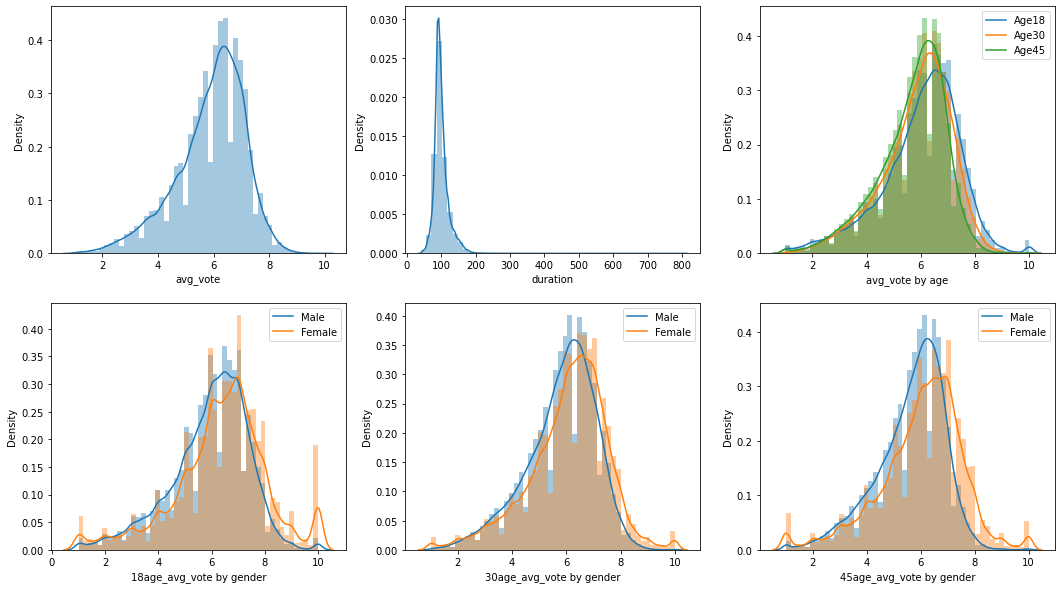

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.distplot(df2['avg_vote'],ax=axes[0, 0])
sns.distplot(df2['duration'],ax=axes[0, 1])
sns.distplot(df2['allgenders_18age_avg_vote'],label = 'Age18',ax=axes[0, 2])
sns.distplot(df2['allgenders_30age_avg_vote'],label = 'Age30',ax=axes[0, 2])
sns.distplot(df2['allgenders_45age_avg_vote'],label = 'Age45',ax=axes[0, 2]).set(xlabel='avg_vote by age')
sns.distplot(df2['males_18age_avg_vote'],label = 'Male',ax=axes[1, 0])
sns.distplot(df2['females_18age_avg_vote'],label = 'Female',ax=axes[1, 0]).set(xlabel='18age_avg_vote by gender')
sns.distplot(df2['males_30age_avg_vote'],label='Male',ax=axes[1, 1])
sns.distplot(df2['females_30age_avg_vote'],label = 'Female',ax=axes[1, 1]).set(xlabel='30age_avg_vote by gender')
sns.distplot(df2['males_45age_avg_vote'],label='Male',ax=axes[1, 2])
sns.distplot(df2['females_45age_avg_vote'],label='Female',ax=axes[1, 2]).set(xlabel='45age_avg_vote by gender')
axes[1,0].legend(['Male', 'Female'])
axes[1,1].legend(['Male', 'Female'])
axes[1,2].legend(['Male', 'Female'])
axes[0,2].legend(['Age18', 'Age30','Age45'])


In [22]:
# sns.distplot(df2['votes'].sort_values()[:209140]) ##plot # of votes 好像没啥意义
# df2['votes'].sort_values() 

In [23]:
df['country_split'] = df['country'].str.split(',')

<AxesSubplot:title={'center':'Top 20 Most Frequent Countries'}>

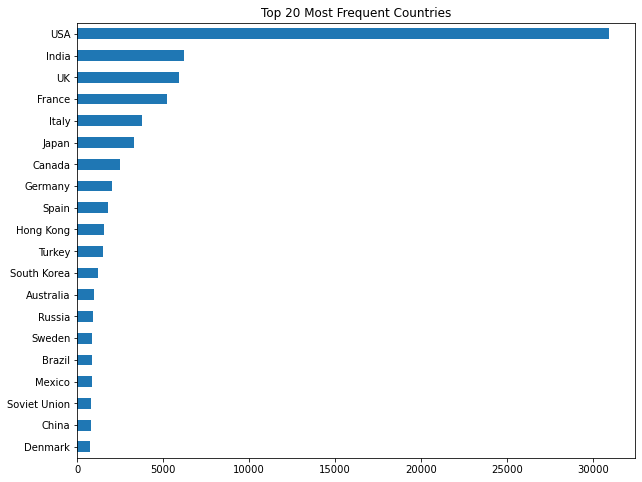

In [24]:
df['country_split'] = df['country'].str.split(',', expand=True)
df['country_split'].value_counts()[:20].sort_values().plot(kind = 'barh', title = 'Top 20 Most Frequent Countries', figsize = (10,8))


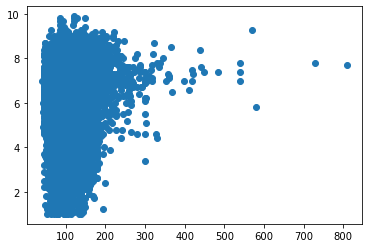

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df2.duration,df2.avg_vote)

In [28]:
!pip install plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
year_df = df2[["year", "avg_vote"]].groupby('year').describe().droplevel(0, axis=1).reset_index()
year_df = year_df.drop(len(year_df)-1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=year_df["year"], y=year_df["mean"], error_y=dict(type='data', array=2*year_df['std'])))
fig.update_layout(title={'text': f"Weighted Average of Movies From Different Years With 95% Confidence Interval", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

<ipython-input-29-5b6ed9bdb118>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Num of Users/Num of Critics Ratios'}, xlabel='user-critics ratio'>

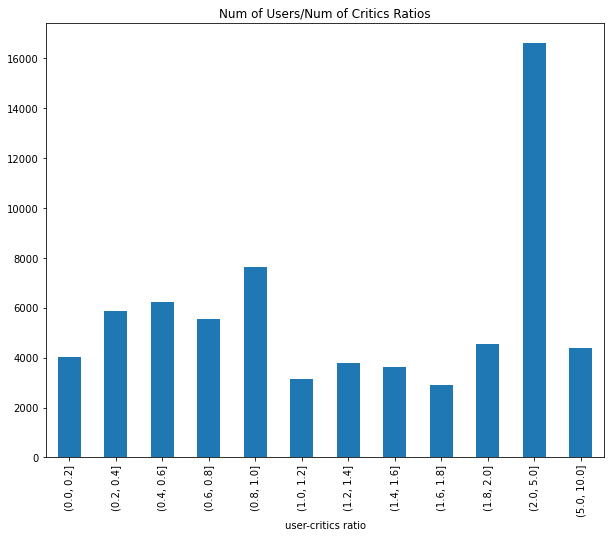

In [29]:
df2['user-critics ratio']= df2['reviews_from_users']/df2['reviews_from_critics']
ranges = [0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,5,10]
df2['user-critics ratio'].groupby(pd.cut(df2['user-critics ratio'], ranges)).count().plot(kind='bar',title="Num of Users/Num of Critics Ratios",figsize=(10,8))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Christopher Nolan'),
  Text(1, 0, 'Stanley Kubrick'),
  Text(2, 0, 'Charles Chaplin'),
  Text(3, 0, 'David Fincher'),
  Text(4, 0, 'Sam Mendes'),
  Text(5, 0, 'Billy Wilder'),
  Text(6, 0, 'Fred C. Newmeyer, Sam Taylor'),
  Text(7, 0, 'Milos Forman'),
  Text(8, 0, 'David Lynch')])

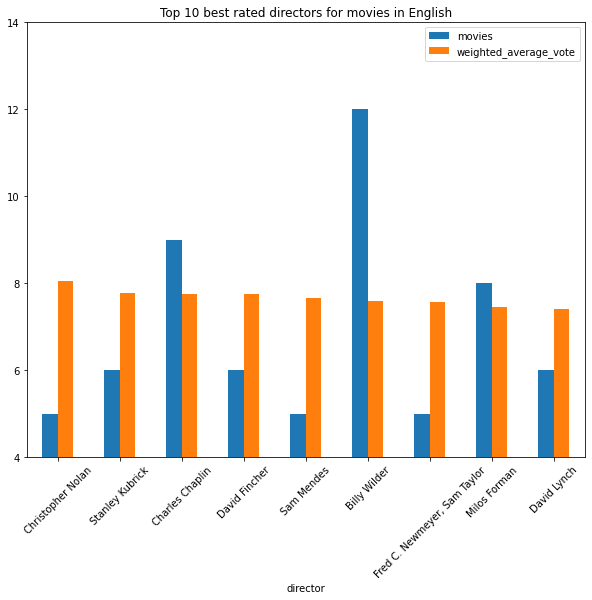

In [30]:
dir_group = df[df['language']=='English'].groupby('director')
dir_mask = dir_group.size().sort_values(ascending=False)>=5
dir_df = df[df['language']=='English'].groupby('director').mean().loc[dir_mask].sort_values("weighted_average_vote", ascending=False)[:9]
dir_df2 = df[df['language']=='English'].groupby('director').size()
dir_df3= dir_df.merge(dir_df2.to_frame(name='movies'),left_index=True, right_index=True)
dir_df3= dir_df3[['movies','weighted_average_vote']]
dir_df3.plot(kind='bar',title="Top 10 best rated directors for movies in English",figsize=(10,8),ylim=(4,14))
plt.xticks(rotation = 45)


In [31]:
dir_df

year    duration  avg_vote  \
director                                                          
Christopher Nolan             2004.000000  119.800000  8.040000   
Stanley Kubrick               1970.166667  131.500000  7.766667   
Charles Chaplin               1941.444444  100.666667  7.755556   
David Fincher                 2001.500000  133.000000  7.750000   
Sam Mendes                    2006.400000  133.200000  7.660000   
Billy Wilder                  1958.583333  113.916667  7.600000   
Fred C. Newmeyer, Sam Taylor  1923.400000   72.200000  7.560000   
Milos Forman                  1987.000000  125.000000  7.450000   
David Lynch                   1989.166667  121.000000  7.416667   

                                      votes  metascore  reviews_from_users  \
director                                                                     
Christopher Nolan             811542.400000  71.600000         1740.400000   
Stanley Kubrick               354487.333333  77.800000          982.666667   
Charles Chaplin                48464.777778  95.000000          126.222222   
David Fincher                 835247.166667  68.666667         1554.000000   
Sam Mendes                    306977.000000  70.750000          920.000000   
Billy Wilder                   71406.666667  79.166667          203.833333   
Fred C. Newmeyer, Sam Taylor    5685.400000        NaN           46.800000   
Milos Forman                  148499.625000  64.571429          267.375000   
David Lynch                   114872.166667  61.500000          543.833333   

                              reviews_from_critics    Action  Adult  \
director                                                              
Christopher Nolan                       290.200000  0.000000    0.0   
Stanley Kubrick                         198.666667  0.000000    0.0   
Charles Chaplin                          62.142857  0.000000    0.0   
David Fincher                           356.000000  0.166667    0.0   
Sam Mendes                              191.000000  0.000000    0.0   
Billy Wilder                            107.500000  0.000000    0.0   
Fred C. Newmeyer, Sam Taylor             33.000000  0.200000    0.0   
Milos Forman                             81.250000  0.000000    0.0   
David Lynch                             170.500000  0.166667    0.0   

                              Adventure  ...  top1000_voters_votes  \
director                                 ...                         
Christopher Nolan              0.200000  ...            740.000000   
Stanley Kubrick                0.166667  ...            687.666667   
Charles Chaplin                0.000000  ...            299.222222   
David Fincher                  0.000000  ...            805.500000   
Sam Mendes                     0.000000  ...            495.000000   
Billy Wilder                   0.000000  ...            457.833333   
Fred C. Newmeyer, Sam Taylor   0.200000  ...            224.400000   
Milos Forman                   0.000000  ...            432.500000   
David Lynch                    0.166667  ...            589.166667   

                              us_voters_rating  us_voters_votes  \
director                                                          
Christopher Nolan                     8.000000    104569.200000   
Stanley Kubrick                       7.800000     61731.166667   
Charles Chaplin                       7.733333      7627.777778   
David Fincher                         7.716667    117927.333333   
Sam Mendes                            7.540000     54844.200000   
Billy Wilder                          7.558333     16247.750000   
Fred C. Newmeyer, Sam Taylor          7.700000      1837.600000   
Milos Forman                          7.325000     25613.750000   
David Lynch                           7.416667     21384.500000   

                              non_us_voters_rating  non_us_voters_votes  \
director                                                                  

In [32]:
tmp_act_df = df.copy() 
tmp_act_df['actors'] = df['actors'].fillna("None")
tmp_act_df['actors'] = tmp_act_df['actors'].str.split(', ')
tmp_act_df = tmp_act_df[tmp_act_df['language']=='English']
flat = [[x, df.loc[i, "weighted_average_vote"]] for i, y in tmp_act_df['actors'].iteritems() for x in y]
rating_df1 = pd.DataFrame(flat, columns=["Actor", "Rating"])
rating_df1 
actor_df = pd.DataFrame(rating_df1.groupby('Actor').size(), columns=["Movies"])
actor_df['Rating'] = rating_df1.groupby('Actor').mean()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Charles Chaplin'),
  Text(1, 0, 'Frank Oz'),
  Text(2, 0, 'Edward Norton'),
  Text(3, 0, 'Anthony Daniels'),
  Text(4, 0, 'Harold Lloyd'),
  Text(5, 0, 'Mark Gatiss'),
  Text(6, 0, 'Benedict Cumberbatch'),
  Text(7, 0, 'Carey Mulligan'),
  Text(8, 0, 'Dave Goelz'),
  Text(9, 0, 'Margaret Sullavan')])

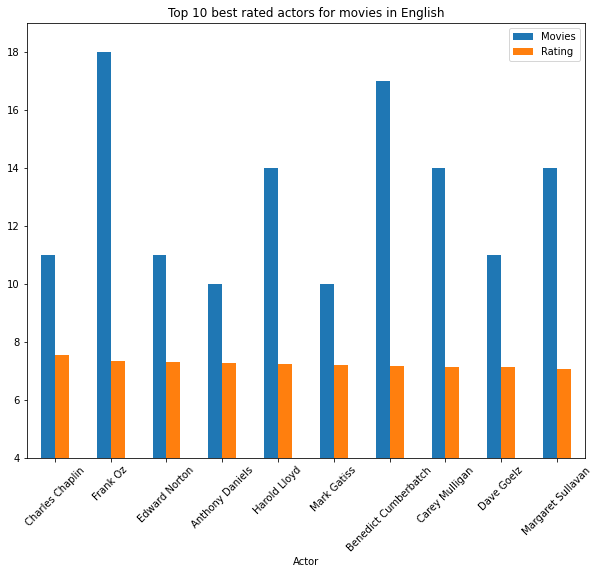

In [33]:
num_movies = 10
LOOK_AT=10
actor_df_split = actor_df.loc[actor_df["Movies"] >= num_movies].sort_values("Rating", ascending=False)
actor_df_split.iloc[:LOOK_AT].plot(kind='bar',title = 'Top 10 best rated actors for movies in English',figsize=(10,8),ylim=(4,19))
plt.xticks(rotation=45)

In [34]:
language_group = df.groupby('language')
lang_mask = language_group.size().sort_values(ascending=False)>=500
lang_df = df.groupby('language').mean().loc[lang_mask].sort_values("weighted_average_vote", ascending=False)

<AxesSubplot:title={'center':'Average Weighted Rating for Each Language (with more than 500 movies)'}, xlabel='language'>

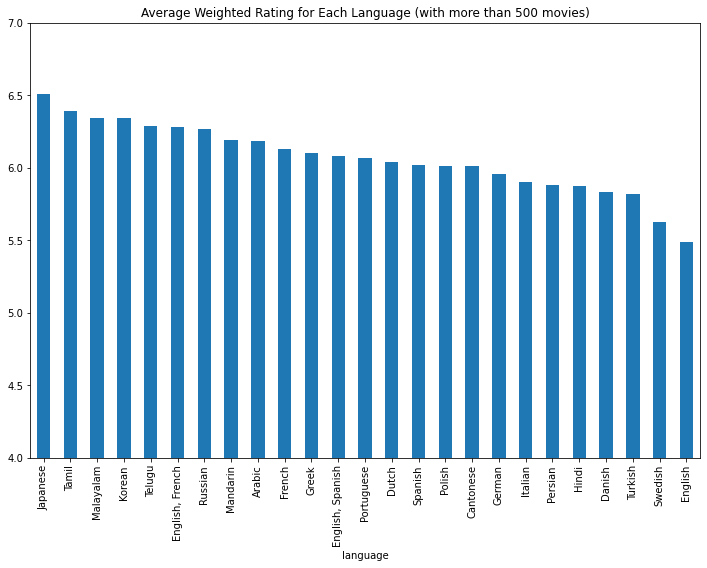

In [35]:
lang_df['weighted_average_vote'].plot(kind='bar',title="Average Weighted Rating for Each Language (with more than 500 movies)",figsize=(12,8),ylim=(4,7))
# Notably, movies in English are the worst rated

<AxesSubplot:title={'center':'Average Weighted Rating for each country (with more than 500 movies)'}, xlabel='country'>

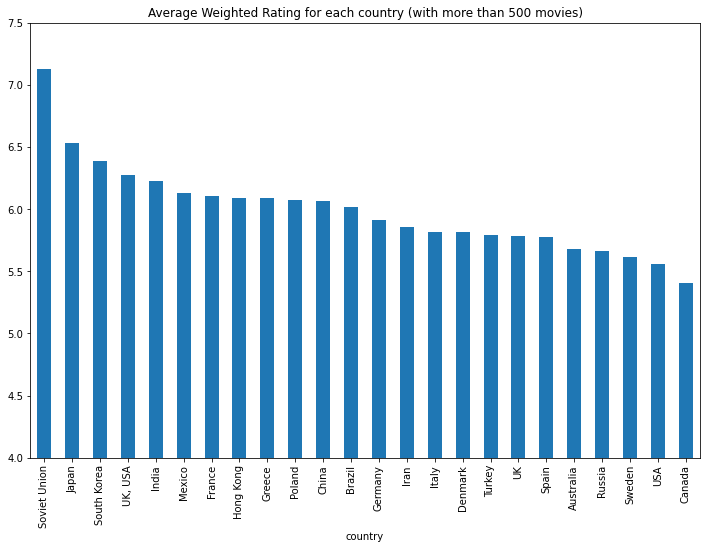

In [36]:
country_group = df.groupby('country')
country_mask = country_group.size().sort_values(ascending=False)>=500
country_df = df.groupby('country').mean().loc[country_mask].sort_values("weighted_average_vote", ascending=False)
country_df['weighted_average_vote'].plot(kind='bar',title="Average Weighted Rating for each country (with more than 500 movies)",figsize=(12,8),ylim=(4,7.5))
# Poeple really appreciate USSR films? UK and USA co-producing movies receive better reviews than seperate productions.

In [37]:
country_group = df.groupby('country')
country_film_number = country_group.size().sort_values(ascending=False)
country_film_number

country
USA                                                              28511
India                                                             6065
UK                                                                4111
Japan                                                             3077
France                                                            3055
Italy                                                             2444
Canada                                                            1802
Germany                                                           1396
Turkey                                                            1351
Hong Kong                                                         1239
Spain                                                             1225
South Korea                                                       1103
Russia                                                             802
Australia                                                          78

In [38]:
# Preparation for Chropoleth
country_df1 = country_df.reset_index()
map_df = country_df1[['country','weighted_average_vote']]
map_df.drop([0,3],inplace=True)  # drop USSR and UK-USA collabs
map_df

C:\Users\52628\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  weighted_average_vote
1         Japan               6.536334
2   South Korea               6.383772
4         India               6.224880
5        Mexico               6.131908
6        France               6.108838
7     Hong Kong               6.091203
8        Greece               6.086462
9        Poland               6.076384
10        China               6.062595
11       Brazil               6.014538
12      Germany               5.913324
13         Iran               5.859657
14        Italy               5.818044
15      Denmark               5.812966
16       Turkey               5.791488
17           UK               5.781099
18        Spain               5.775020
19    Australia               5.677325
20       Russia               5.664963
21       Sweden               5.611415
22          USA               5.556084
23       Canada               5.403718

In [39]:
# Chropoleth
import folium
m = folium.Map(location=[23.930468,-28.243126],zoom_start=1.5,width='70%', height='70%')
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
map_df = map_df.replace('USA', "United States of America")
map_df = map_df.replace('UK', "United Kingdom")
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='choropleth rating',
    data=map_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['country', 'weighted_average_vote'],
    key_on='feature.properties.name',
    fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
    legend_name='Weighted average vote'
).add_to(m)
folium.LayerControl().add_to(m)
m


<AxesSubplot:title={'center':'Genre Composition'}, ylabel='None'>

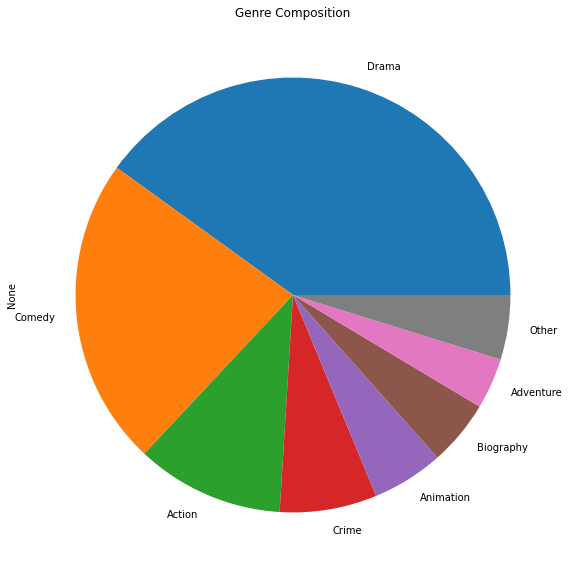

In [40]:
# Top5000 movie genre composition
top_5000_df = df2.sort_values('weighted_average_vote',ascending=False).iloc[:5000]
top_5000_df.groupby('genre').size().sort_values(ascending = False)
top_5000_df['genre_split'] = top_5000_df['genre'].str.split(',')

top_5000_df['genre_split'] = top_5000_df['genre'].str.split(',', expand=True)
top_5000_df2 =top_5000_df['genre_split'].value_counts().sort_values(ascending=False)
top_5000_df3= top_5000_df2.iloc[:7]
top_5000_df4 = top_5000_df3.append(pd.Series({'Other':top_5000_df2.iloc[7:].sum()}))
top_5000_df4.plot(kind='pie',figsize=(12,10),title = 'Genre Composition')

# Text mining

In [ ]:
#word cloud for genre
text = ' '.join(movie["genre"])

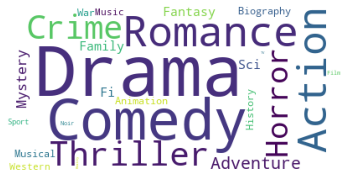

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(max_words=1000000,background_color="white",collocations = False).generate(str(text))

#wordcloud = WordCloud(max_words=1000000,background_color="white",collocations = False, width=3000,height=3000).generate(str(text)) #方形图如果大家喜欢

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#word clouds for age groups
def word_cloud_age_fuc(vote_name, vote_quan,colormap):
    df_temp = df[df[vote_quan]>=500]    #medan 500
    df_temp = df_temp.sort_values(vote_name,ascending = False).head(200) 

    text = ' '.join(df_temp["description"])   
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=STOPWORDS,background_color="white", colormap=colormap).generate(str(text))
    #wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=STOPWORDS,background_color="white",collocations = False, width=300,height=300).generate(str(text)) #方形图如果大家喜欢

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

#draft
#df_temp = df[df['allgenders_18age_votes']>=1000]
#df_temp = df_temp.sort_values('allgenders_18age_avg_vote',ascending = False).head(2000)
#df_temp

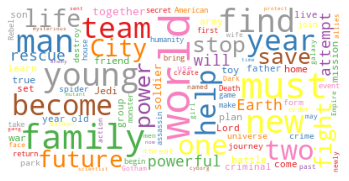

In [ ]:
word_cloud_age_fuc('allgenders_0age_avg_vote','allgenders_0age_votes','Set1')

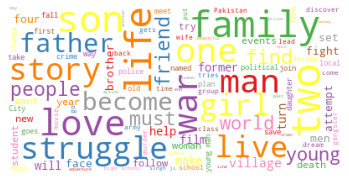

In [ ]:
word_cloud_age_fuc('allgenders_18age_avg_vote','allgenders_18age_votes','Set1')

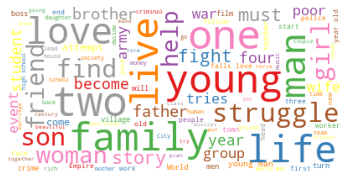

In [ ]:
word_cloud_age_fuc('allgenders_30age_avg_vote','allgenders_30age_votes','Set1')

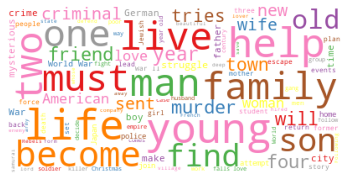

In [ ]:
word_cloud_age_fuc('allgenders_45age_avg_vote','allgenders_45age_votes','Set1')

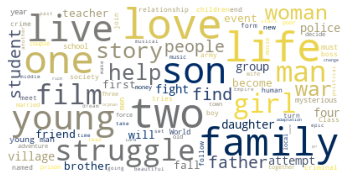

In [ ]:
#word clouds for gender groups
word_cloud_age_fuc('males_allages_avg_vote','males_allages_votes','cividis')

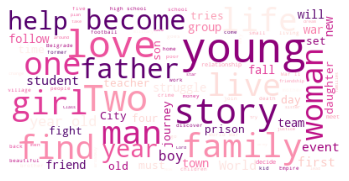

In [ ]:
word_cloud_age_fuc('females_allages_avg_vote','females_allages_votes','RdPu')

In [ ]:
#word clouds for genre for age/gender groups
def word_cloud_genre_fuc(vote_name, vote_quan):
    df_temp = df[df[vote_quan]>=100]    #或者500因为median是500
    df_temp = df_temp.sort_values(vote_name,ascending = False).head(50) #大概前6%

    text = ' '.join(df_temp["genre"])  
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(max_font_size=50,max_words=15,background_color="white",collocations = False).generate(str(text))

    #wordcloud = WordCloud(max_words=1000000,background_color="white",collocations = False, width=3000,height=3000).generate(str(text)) #方形图如果大家喜欢

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

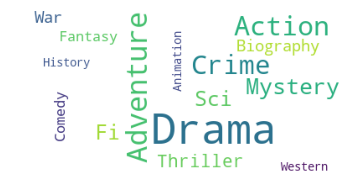

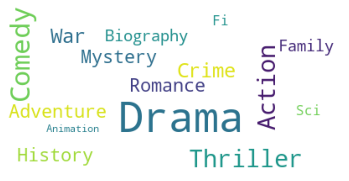

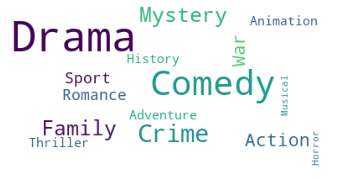

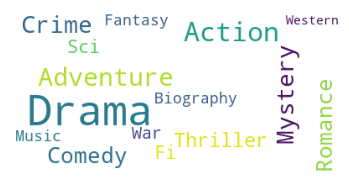

In [ ]:
word_cloud_genre_fuc('allgenders_0age_avg_vote','allgenders_0age_votes')
word_cloud_genre_fuc('allgenders_18age_avg_vote','allgenders_18age_votes')
word_cloud_genre_fuc('allgenders_30age_avg_vote','allgenders_30age_votes')
word_cloud_genre_fuc('allgenders_45age_avg_vote','allgenders_45age_votes')

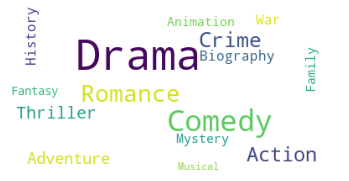

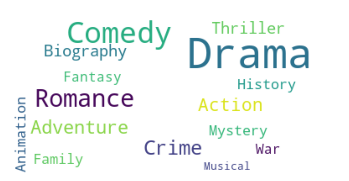

In [ ]:
word_cloud_genre_fuc('males_allages_avg_vote','males_allages_votes')
word_cloud_genre_fuc('females_allages_avg_vote','females_allages_votes')

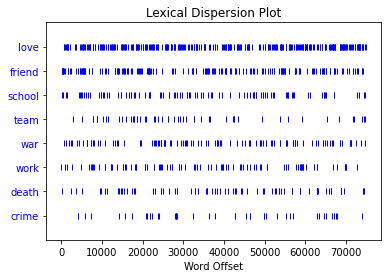

In [ ]:
#dispersion_plot
df_temp = df[df["year"]>=2010]   #近10年
df_temp = df_temp[df_temp["avg_vote"]>=7.3]
df_temp = df_temp[df_temp["votes"]>=100]
df_temp = df_temp.sort_values("date_published",ascending = True)
text = ' '.join(df_temp["description"])  
text = stemmer_func(text)
text.dispersion_plot(["love","friend","school","team","war","work","death","crime"])

In [ ]:
df.to_csv('df.csv')

# Machine Learning

In [ ]:
# drop the data points with year < 1960 or total_votes < 10000
df = df[df['year'] >= 1960]
df = df[df['total_votes'] >= 10000]

df = df.drop(df.loc[:, 'Action':'Western'],axis=1)

# one hot encoding for movie features
genre_dummies = df['genre'].str.get_dummies(sep=', ')
df = pd.concat([df, genre_dummies], axis=1)

director_dummies = df['director'].str.get_dummies(sep=', ')
df = pd.concat([df, director_dummies], axis=1)

company_dummies = df['production_company'].str.get_dummies(sep=', ')
df = pd.concat([df, company_dummies], axis=1)

country_dummies = df['country'].str.get_dummies(sep=', ')
df = pd.concat([df, country_dummies], axis=1)

language_dummies = df['language'].str.get_dummies(sep=', ')
df = pd.concat([df, language_dummies], axis=1)

# put movie features together
year = df['year']
duration = df['duration']
df.drop(labels=['year'], axis=1, inplace=True)
df.insert(len(df.columns), 'year', year)
df.drop(labels=['duration'], axis=1, inplace=True)
df.insert(len(df.columns), 'duration', duration)

# define dependent variables
df['allgenders'] = np.where(
    np.logical_and(
        df['allgenders_18age_avg_vote'] > df['allgenders_30age_avg_vote'],
        df['allgenders_18age_avg_vote'] > df['allgenders_45age_avg_vote']), 0,
        np.where(df['allgenders_30age_avg_vote'] > df['allgenders_45age_avg_vote'], 1, 2))

df['males'] = np.where(
    np.logical_and(
        df['males_18age_avg_vote'] > df['males_30age_avg_vote'],
        df['males_18age_avg_vote'] > df['males_45age_avg_vote']), 0,
        np.where(df['males_30age_avg_vote'] > df['males_45age_avg_vote'], 1, 2))

df['females'] = np.where(
    np.logical_and(
        df['females_18age_avg_vote'] > df['females_30age_avg_vote'],
        df['females_18age_avg_vote'] > df['females_45age_avg_vote']), 0,
        np.where(df['females_30age_avg_vote'] > df['females_45age_avg_vote'], 1, 2))

df['allages'] = np.where(
    df['males_allages_avg_vote'] >= df['females_allages_avg_vote'], 0, 1)d

In [ ]:
df.head(10)

title  ... allages
imdb_title_id                                                 ...        
0035423                                       Kate & Leopold  ...       1
0053459                                    Occhi senza volto  ...       0
0053472                              Fino all'ultimo respiro  ...       0
0053580                                La battaglia di Alamo  ...       0
0053604                                       L'appartamento  ...       0
0053619                                          L'avventura  ...       0
0053779                                        La dolce vita  ...       0
0053793                                   Il figlio di Giuda  ...       0
0053925                                     I vivi e i morti  ...       1
0053946                             ...E l'uomo creò Satana!  ...       1
0053976                             La fontana della vergine  ...       0
0054033                           The Little Shop of Horrors  ...       1
0054047                                    I magnifici sette  ...       1
0054067                              La maschera del demonio  ...       0
0054130                                             La notte  ...       1
0054135                                         Colpo grosso  ...       1
0054167                                  L'occhio che uccide  ...       0
0054189                                        In pieno sole  ...       1
0054215                                                Psyco  ...       0
0054248                              Rocco e i suoi fratelli  ...       1
0054331                                            Spartacus  ...       0
0054357                      Robinson nell'isola dei corsari  ...       1
0054387                          L'uomo che visse nel futuro  ...       0
0054389                                  Tirate sul pianista  ...       0
0054407                                              Il buco  ...       0
0054443                             Il villaggio dei dannati  ...       0
0054460                            I cattivi dormono in pace  ...       1
0054632                            L'anno scorso a Marienbad  ...       1
0054698                                 Colazione da Tiffany  ...       1
0054743                                           Quelle due  ...       1
...                                                      ...  ...     ...
8946378                        Cena con delitto - Knives Out  ...       0
8954732                         Nei panni di una principessa  ...       1
8983202                                          Kabir Singh  ...       0
9024106                                            Unplanned  ...       0
9052870                                           Chhichhore  ...       1
9071322                                        Cattive acque  ...       1
9086228                                      Gretel e Hansel  ...       0
9214832                                                Emma.  ...       1
9243946                   El Camino: Il film di Breaking Bad  ...       0
9248940                                           Dream Girl  ...       0
9248972                                       Mission Mangal  ...       1
9252508                                            Tall Girl  ...       1
9345754                                   Dov'è la tua casa?  ...       0
9354842                                   P.S. Ti amo ancora  ...       1
9354944                                                 Jexi  ...       0
9398640                           Between Two Ferns: Il film  ...       0
9419834                                     Secret Obsession  ...       1
9420648                                                 Bala  ...       0
9426210                                  Weathering with You  ...       0
9484998                                         Palm Springs  ...       0
9614460                                             Chhapaak  ...       1
9619798                                   La Missy sbagliat

In [ ]:
# split the dataframe into training set and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

x_start = df.columns.get_loc('Action')
x_train = train.iloc[:, x_start:len(df.columns) - 4]
x_test = test.iloc[:, x_start:len(df.columns) - 4]

# ag: allgenders
y_train_ag = train.iloc[:, len(df.columns) - 4]
y_test_ag = test.iloc[:, len(df.columns) - 4]

# m: males
y_train_m = train.iloc[:, len(df.columns) - 3]
y_test_m = test.iloc[:, len(df.columns) - 3]

# f: females
y_train_f = train.iloc[:, len(df.columns) - 2]
y_test_f = test.iloc[:, len(df.columns) - 2]

# aa: allages
y_train_aa = train.iloc[:, len(df.columns) - 1]
y_test_aa = test.iloc[:, len(df.columns) - 1]

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

model_allgenders = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_allgenders.fit(x_train, y_train_ag)

model_males = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_males.fit(x_train, y_train_m)

model_females = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_females.fit(x_train, y_train_f)

model_allages = RandomForestClassifier(n_estimators=100, criterion='entropy')
model_allages.fit(x_train, y_train_aa)

allgenders_score = model_allgenders.score(x_test, y_test_ag)
males_score = model_males.score(x_test, y_test_m)
females_score = model_females.score(x_test, y_test_f)
allages_score = model_allages.score(x_test, y_test_aa)

In [ ]:
print(allgenders_score, males_score, females_score, allages_score)

0.6523165231652317 0.6314063140631406 0.5756457564575646 0.6568265682656826


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_ag = model_allgenders.predict(x_test)
cfm_allgenders = confusion_matrix(np.ravel(y_test_ag), y_pred_ag)

y_pred_m = model_males.predict(x_test)
cfm_males = confusion_matrix(np.ravel(y_test_m), y_pred_m)

y_pred_f = model_females.predict(x_test)
cfm_females = confusion_matrix(np.ravel(y_test_f), y_pred_f)

y_pred_aa = model_allages.predict(x_test)
cfm_allages = confusion_matrix(np.ravel(y_test_aa), y_pred_aa)

In [ ]:
# Grid Search and Cross-Validation
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (40, 70, 100, 130, 160),
    'min_samples_split': (1,2,3,5,10),
    'min_samples_leaf': (1,2,3,5,10)
}

model = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [ ]:
model_allgenders = model.fit(x_train, np.ravel(y_train_ag))
model_allgenders.best_score_, model_allgenders.best_params_

(0.6343178621659634,
 {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})

In [ ]:
model_males = model.fit(x_train, np.ravel(y_train_m))
model_males.best_score_, model_males.best_params_

(0.6132208157524613,
 {'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100})

In [ ]:
model_females = model.fit(x_train, np.ravel(y_train_f))
model_females.best_score_, model_females.best_params_

(0.571378340365682,
 {'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200})

In [ ]:
model_allages = model.fit(x_train, np.ravel(y_train_aa))
model_allages.best_score_, model_allages.best_params_

(0.6612165963431786,
 {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100})

In [ ]:
# results of all models from Grid Search and Cross-Validation
allgen_cv = pd.DataFrame.from_dict(model_allgenders.cv_results_).iloc[:,[4,5,6,11,-1]]

male_cv = pd.DataFrame.from_dict(model_males.cv_results_).iloc[:,[4,5,6,11,-1]]

female_cv = pd.DataFrame.from_dict(model_females.cv_results_).iloc[:,[4,5,6,11,-1]]

allgender_cv = pd.DataFrame.from_dict(model_allages.cv_results_).iloc[:,[4,5,6,11,-1]]

Description

In [ ]:
import numpy as np

from numpy import mean


# evaluate accuracy
def evaluate_acc(y_predicted, y_test):
    return mean(y_predicted == y_test)


# fraction float to percentage string
def percent(fraction):
    return "{:.2%}".format(fraction)


# fit on train date and test on test data using the selected model
def fit_and_test(model, x_train, y_train, x_test, y_test):
    # train
    model.fit(x_train, y_train)

    # test
    y_predicted = model.predict(x_test)
    test_acc = evaluate_acc(y_predicted, y_test)
    print(f'test accuracy: {percent(test_acc)}')



# takes training data pair (x, y) as input and splits it into k folds
def cross_validation_split(x, y, k):
    if len(x) != len(y):
        raise Exception("x and y are not of the same length.")

    # Shuffle the data
    size = len(x)
    inds = np.random.permutation(size)

    random_x = x[inds]
    random_y = y[inds]

    new_x = np.array_split(random_x, k)
    new_y = np.array_split(random_y, k)

    return new_x, new_y


# takes train/validation sets generated above and a given model as input,
# iterate through each train/validation set and returns the average result of each fold
def kfoldCV(x_folds, y_folds, model):
    k = len(x_folds)
    accuracy = np.empty(k, dtype=object)

    for j in range(k):
        x_test = x_folds[j]
        y_test = y_folds[j]
        b = [x for i, x in enumerate(range(k)) if i != j]
        x_train = x_folds[b[0]]
        y_train = y_folds[b[0]]
        for index in b[1:]:
            x_train = np.concatenate((x_train, x_folds[index]), axis=0)
            y_train = np.concatenate((y_train, y_folds[index]), axis=0)
        model = model.fit(x_train, y_train)
        predicted = model.predict(x_test)
        accuracy[j] = evaluate_acc(predicted, y_test)

    return (np.mean(accuracy))


# 5-fold cross validation
def five_fold_cross_validation(x_train, y_train, model, output=True):
    # cross validation
    k_value = 5
    x_folds, y_folds = cross_validation_split(x_train, y_train, k_value)
    k_fold_acc = kfoldCV(x_folds, y_folds, model)
    if output:
        print(f'{k_value} fold validation accuracy: {percent(k_fold_acc)}')
    return k_fold_acc

In [ ]:
df.dropna(inplace= True,axis=0,subset=['allgenders', 'males','females','allages','description'])
df.shape

(8127, 6702)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

from pandas import read_csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


def process_data(data, frequency=2, features=None):
    # select vectorizer
    if features is not None:
        count_vect = CountVectorizer(vocabulary=features)
    else:
        count_vect = CountVectorizer(stop_words="english", min_df=frequency)

    # vectorize data
    x_counts = count_vect.fit_transform(data)

    # transform vectors to tf-idf (term frequency–inverse document frequency)
    tfidf_transformer = TfidfTransformer()
    x_tfidf = tfidf_transformer.fit_transform(x_counts)

    # return tf-idf and the list of features
    return x_tfidf.toarray(), count_vect.get_feature_names()

from sklearn.model_selection import train_test_split

y = df.allgenders
x, features=process_data(df.description)
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=10)
print(x_train.shape)
print(x_test.shape)
#x_train, features = process_data(description_train)
#x_test, test_features = process_data(description_test)
# load train dataset
#movie_data_train = read_csv('movie.csv', encoding='utf-8')
#movie_data_train = read_csv('movie_data.csv', encoding='utf-8',nrows=5000)
#df.dropna(inplace= True,axis=0)
#df1 = df[:-200]
#df2 = df[-200:]
#x_train, features = process_data(movie_data_train.description)
#print(df.allages)
#x_train, features = process_data(df1.description)
#y_train = df1.allages

    # load test dataset
    #movie_data_test = read_csv('movie.csv', encoding='utf-8')
    #movie_data_test = read_csv('movie_data.csv', encoding='utf-8',nrows=1000)

    #x_test, test_features = process_data(movie_data_test.review, features=features)
    #y_test = movie_data_test.votes
#x_test, test_features = process_data(df2.description)
#y_test = df2.allages

y_train.shape

#shape(x_train)
#print(y_train.shape())


(8127, 8823)
(8127,)
(7314, 8823)
(813, 8823)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



(7314,)

In [ ]:
import numpy as np


# from pyprind import ProgBar


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils.fixes import loguniform

from time import time

def multi_NB_tune(x_train, y_train, progress_bar=False):
    print('tuning multinomial Naive Bayes:')
    alpha_list = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
    print(f'testing alpha on {alpha_list}')
    scores = []

    # if progress_bar:
    #     pbar = ProgBar(len(alpha_list), bar_char='█')

    for a in alpha_list:
        scores.append([five_fold_cross_validation(x_train, y_train, MultinomialNB(alpha=a), output=False), a])
        # if progress_bar:
        #     pbar.update()

    scores.sort(reverse=True)

    print('results:')
    for i in range(len(alpha_list)):
        print(f'{i}. accuracy is {percent(scores[i][0])} for alpha = {scores[i][1]}')

    return scores[0][0], scores[0][1]

# Multinomial Naive Bayers class
class MultinomialNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

print('\ntuning hyperparameters...')

# find best alpha using grid search with 5-fold cross validation
multiNB_best_acc, multiNB_best_alpha = multi_NB_tune(x_train, y_train)
print('hyperparameters tuned!')
print('\nmodels:')
print(f'using Multinomial Naive Bayes with alpha = {multiNB_best_alpha} :')
print('\nfit on 100% train set, and test on test set:')

# fits and test multinomial Naive Beyars
print('running Multinomal Naive Bayes:')
multiNB_best_alpha = 0.1
model = MultinomialNB(alpha=multiNB_best_alpha)
fit_and_test(model, x_train, y_train, x_test, y_test)

#gender classification
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
MultinomialNB()


tuning hyperparameters...
tuning multinomial Naive Bayes:
testing alpha on [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
results:
0. accuracy is 62.02% for alpha = 1.0
1. accuracy is 61.72% for alpha = 10.0
2. accuracy is 61.72% for alpha = 2.0
3. accuracy is 61.72% for alpha = 5.0
4. accuracy is 61.29% for alpha = 0.5
5. accuracy is 59.80% for alpha = 0.2
6. accuracy is 58.52% for alpha = 0.1
hyperparameters tuned!

models:
using Multinomial Naive Bayes with alpha = 1.0 :

fit on 100% train set, and test on test set:
running Multinomal Naive Bayes:
test accuracy: 61.99%


MultinomialNB()

In [ ]:

y = df.allages
x, features=process_data(df.description)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=10)

print('\ntuning hyperparameters...')

# find best alpha using grid search with 5-fold cross validation
multiNB_best_acc, multiNB_best_alpha = multi_NB_tune(x_train, y_train)
print('hyperparameters tuned!')
print('\nmodels:')
print(f'using Multinomial Naive Bayes with alpha = {multiNB_best_alpha} :')
print('\nfit on 100% train set, and test on test set:')

#age classification
# fits and test multinomial Naive Beyars
print('running Multinomal Naive Bayes:')
multiNB_best_alpha = 0.1
model = MultinomialNB(alpha=multiNB_best_alpha)
fit_and_test(model, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.




tuning hyperparameters...
tuning multinomial Naive Bayes:
testing alpha on [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
results:
0. accuracy is 61.58% for alpha = 1.0
1. accuracy is 61.47% for alpha = 0.5
2. accuracy is 60.42% for alpha = 2.0
3. accuracy is 59.94% for alpha = 0.2
4. accuracy is 59.83% for alpha = 0.1
5. accuracy is 59.57% for alpha = 5.0
6. accuracy is 59.48% for alpha = 10.0
hyperparameters tuned!

models:
using Multinomial Naive Bayes with alpha = 1.0 :

fit on 100% train set, and test on test set:
running Multinomal Naive Bayes:
test accuracy: 60.89%


In [ ]:
#age classification within males
y = df.males
x, features=process_data(df.description)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=10)

print('\ntuning hyperparameters...')

# find best alpha using grid search with 5-fold cross validation
multiNB_best_acc, multiNB_best_alpha = multi_NB_tune(x_train, y_train)
print('hyperparameters tuned!')
print('\nmodels:')
print(f'using Multinomial Naive Bayes with alpha = {multiNB_best_alpha} :')
print('\nfit on 100% train set, and test on test set:')

# fits and test multinomial Naive Beyars
print('running Multinomal Naive Bayes:')
multiNB_best_alpha = 0.1
model = MultinomialNB(alpha=multiNB_best_alpha)
fit_and_test(model, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.




tuning hyperparameters...
tuning multinomial Naive Bayes:
testing alpha on [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
results:
0. accuracy is 60.06% for alpha = 1.0
1. accuracy is 59.89% for alpha = 2.0
2. accuracy is 59.79% for alpha = 5.0
3. accuracy is 59.79% for alpha = 10.0
4. accuracy is 59.73% for alpha = 0.5
5. accuracy is 58.26% for alpha = 0.2
6. accuracy is 57.38% for alpha = 0.1
hyperparameters tuned!

models:
using Multinomial Naive Bayes with alpha = 1.0 :

fit on 100% train set, and test on test set:
running Multinomal Naive Bayes:
test accuracy: 57.69%


In [ ]:
#age classification within females
y = df.females
x, features=process_data(df.description)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=10)



print('\ntuning hyperparameters...')

# find best alpha using grid search with 5-fold cross validation
multiNB_best_acc, multiNB_best_alpha = multi_NB_tune(x_train, y_train)
print('hyperparameters tuned!')
print('\nmodels:')
print(f'using Multinomial Naive Bayes with alpha = {multiNB_best_alpha} :')
print('\nfit on 100% train set, and test on test set:')

# fits and test multinomial Naive Beyars
print('running Multinomal Naive Bayes:')
multiNB_best_alpha = 0.1
model = MultinomialNB(alpha=multiNB_best_alpha)
fit_and_test(model, x_train, y_train, x_test, y_test)

print(y_train.shape)
print(y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.




tuning hyperparameters...
tuning multinomial Naive Bayes:
testing alpha on [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
results:
0. accuracy is 50.49% for alpha = 5.0
1. accuracy is 50.37% for alpha = 2.0
2. accuracy is 49.90% for alpha = 1.0
3. accuracy is 49.69% for alpha = 10.0
4. accuracy is 49.62% for alpha = 0.5
5. accuracy is 49.19% for alpha = 0.2
6. accuracy is 48.84% for alpha = 0.1
hyperparameters tuned!

models:
using Multinomial Naive Bayes with alpha = 5.0 :

fit on 100% train set, and test on test set:
running Multinomal Naive Bayes:
test accuracy: 51.54%
(7314,)
(813,)


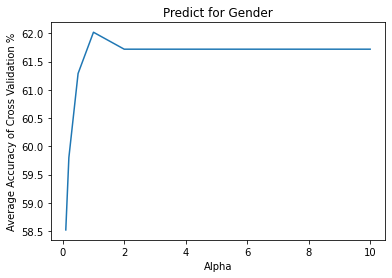

In [ ]:
import matplotlib.pyplot as plt
# tuning Large Movie Review multinomial Naive Bayes for gender
x = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
y = [58.52, 59.80, 61.29, 62.02, 61.72, 61.72, 61.72]
plt.plot(x, y)
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy of Cross Validation %')
plt.title('Predict for Gender')
plt.show()


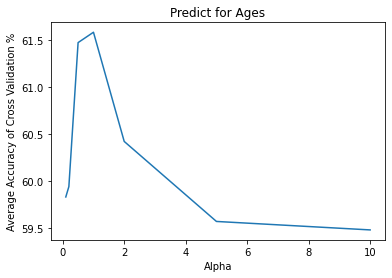

In [ ]:
# tuning Large Movie Review multinomial Naive Bayes for ages
x = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
y = [59.83, 59.94, 61.47, 61.58, 60.42, 59.57, 59.48]
plt.plot(x, y)
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy of Cross Validation %')
plt.title('Predict for Ages')
plt.show()



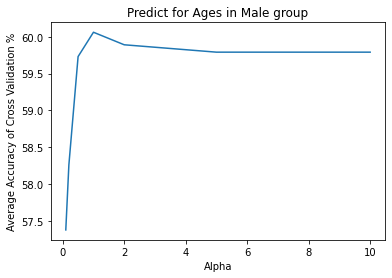

In [ ]:
# tuning Large Movie Review multinomial Naive Bayes for ages in male group
x = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
y = [57.38, 58.26, 59.73, 60.06, 59.89, 59.79, 59.79]
plt.plot(x, y)
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy of Cross Validation %')
plt.title('Predict for Ages in Male group')
plt.show()





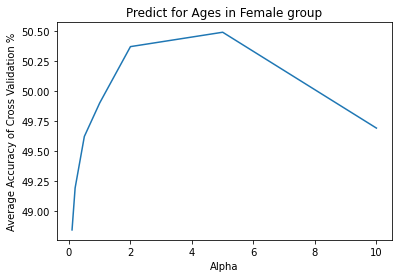

In [ ]:
# tuning Large Movie Review multinomial Naive Bayes for ages in female group
x = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
y = [48.84, 49.19, 49.62, 49.90, 50.37,50.49, 49.69]
plt.plot(x, y)
plt.xlabel('Alpha')
plt.ylabel('Average Accuracy of Cross Validation %')
plt.title('Predict for Ages in Female group')
plt.show()

